# Exploring Rear Dump Truck Cycle Time Data:
# 1. Truck Productivity

Author: Dhitya Suryaputra Arieandra

Email: dhityariendra@gmail.com

In [61]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import timedelta
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.3


Here we are using csv file data for read dump truck cycle time on 25 June 2020

In [2]:
# Importing data
# you can import file using csv file I uploaded in this repositories in Github
# !wget -O Cycle_Time_25June2020.csv 


df=pd.read_csv(r"H:\FILE\Thiess\FMS\Visual Studio Code\Coal_mining\Cycle_Time_25June2020.csv")
df.head(5)

,date,shift,hour,hourtime,trucks,truck_class,digger,digger_class,pit,material_type,...,distance_loaded_meter,traveling_time_seconds,waiting_time_seconds,spotting_time_seconds,loading_time_seconds,hauling_time_seconds,queued_time_seconds,backing_time_seconds,tipping_time_seconds,shovel_hang_time_seconds
0,6/25/2020,Day,7,7:40 AM,RD0001,CAT785,EX001,H3600,Pit-A,Waste,...,2724,126,5,12,131,507,0,30,61,15
1,6/25/2020,Day,7,7:40 AM,RD0002,CAT785,EX002,H3600,Pit-D,Waste,...,1350,262,191,11,126,231,2,31,28,59
2,6/25/2020,Day,7,7:40 AM,RD0003,CAT785,EX003,H3600,Pit-A,Waste,...,2778,361,1,3,92,457,4,27,30,0
3,6/25/2020,Day,7,7:40 AM,RD0004,CAT785,EX004,H3600,Pit-A,Waste,...,2365,276,269,0,104,531,0,1,37,0
4,6/25/2020,Day,7,7:40 AM,RD0005,CAT785,EX005,H3600,Pit-A,Waste,...,2835,97,357,0,162,507,4,23,36,0


In [33]:
# Checking data types in dataframe
df.dtypes

date                        datetime64[ns]
shift                               object
hour                                 int64
hourtime                            object
trucks                              object
truck_class                         object
digger                              object
digger_class                        object
pit                                 object
material_type                       object
std_material_tonnage                 int64
std_material_volume                float64
actual_tonnage_payload             float64
distance_empty_meter                 int64
distance_loaded_meter                int64
traveling_time_seconds               int64
waiting_time_seconds                 int64
spotting_time_seconds                int64
loading_time_seconds                 int64
hauling_time_seconds                 int64
queued_time_seconds                  int64
backing_time_seconds                 int64
tipping_time_seconds                 int64
shovel_hang

In [4]:
# Convert obj to datetime for 'date' column
df['date'] = df['date'].astype('datetime64[ns]')

In this case we will trying to calculate trucks productivity as formula below:

![](Truck-pdty.png)

Based on the formula above, we wil calculate the truck productivity by doing this steps on our datasets:

1. ***`Tonnage Hauled`*** --- ***unit:`(Ton)`*** = Represent on dataframe as ***actual_tonnage_payload*** 
2. ***`Distance Hauled`*** --- ***unit:`(KM)`*** = We will calculate this by averaging the ***distance_empty*** and ***distance_loaded*** on the datasets 
3. ***`Cycle Time`*** --- ***unit:`(Hour)`***    = This required us to calculate all of trucks activities on the datasets: 
    * Travelling_time_seconds
    * Waiting_time_seconds
    * Spotting_time_seconds
    * Loading_time_seconds
    * Hauling_time_seconds
    * Queued_time_seconds
    * Backing_time_seconds
    * Tipping_time_seconds

In [5]:
# Calculating Total Cycle time
ct_sec = df['traveling_time_seconds']+df['waiting_time_seconds']+df['spotting_time_seconds']+df['loading_time_seconds']+df['hauling_time_seconds']+df['queued_time_seconds']+df['backing_time_seconds']+df['tipping_time_seconds']
ct_min = (ct_sec/60).round(2) # ----- convert to minutes
ct_hour = (ct_min/60).round(2) # ----- convert to hour
df["ct_sec"] = ct_sec
df["ct_min"] = ct_min
df["ct_hr"] = ct_hour

# Calculating Distance 
dist_avg_meter = ((df['distance_empty_meter']+df['distance_loaded_meter'])/2).round(2)
dist_avg_km = (dist_avg_meter/1000).round(2) # ----- convert to kilometres
df["dist_avg_km"] = dist_avg_km

# Calculating Truck Productivities
tr_pdty = (df["actual_tonnage_payload"]*df["dist_avg_km"])/df["ct_hr"]
df["tr_pdty"] = tr_pdty

# Calculating Truck speed 
spd_empty = (df['distance_empty_meter']/1000)/(df['traveling_time_seconds']/3600)
df["spd_empty"] = spd_empty.round(2)

spd_loaded = (df['distance_loaded_meter']/1000)/(df['hauling_time_seconds']/3600)
df["spd_loaded"] = spd_loaded.round(2)

spd_avg = ((df["spd_empty"]+df["spd_loaded"])/2)
df["spd_avg"] = spd_avg.round(2)

df.head()

,date,shift,hour,hourtime,trucks,truck_class,digger,digger_class,pit,material_type,...,tipping_time_seconds,shovel_hang_time_seconds,ct_sec,ct_min,ct_hr,dist_avg_km,tr_pdty,spd_empty,spd_loaded,spd_avg
0,2020-06-25,Day,7,7:40 AM,RD0001,CAT785,EX001,H3600,Pit-A,Waste,...,61,15,872,14.53,0.24,2.74,1470.466667,78.57,19.34,48.96
1,2020-06-25,Day,7,7:40 AM,RD0002,CAT785,EX002,H3600,Pit-D,Waste,...,28,59,882,14.70,0.24,1.35,921.937500,18.51,21.04,19.77
2,2020-06-25,Day,7,7:40 AM,RD0003,CAT785,EX003,H3600,Pit-A,Waste,...,30,0,975,16.25,0.27,2.78,1686.533333,27.70,21.88,24.79
3,2020-06-25,Day,7,7:40 AM,RD0004,CAT785,EX004,H3600,Pit-A,Waste,...,37,0,1218,20.30,0.34,2.37,1141.085294,30.85,16.03,23.44
4,2020-06-25,Day,7,7:40 AM,RD0005,CAT785,EX005,H3600,Pit-A,Waste,...,36,0,1186,19.77,0.33,2.89,1360.927273,109.63,20.13,64.88


In [6]:
print("Total row and columns:", df.shape)

Total row and columns: (4252, 32)


In [62]:
print('Describe data (object):\n')
print(df.describe(include=['object']))

Describe data (object):

        shift  hourtime  trucks truck_class digger digger_class    pit  \
count    4252      4252    4252        4252   4252         4252   4252   
unique      2        24     136           5     26            5      5   
top     Night  10:40 AM  RD0025      CAT785  EX010        H3600  Pit-A   
freq     2415       245      72        2985    363         2637   1663   

       material_type  
count           4252  
unique             2  
top            Waste  
freq            3993  


In [53]:
print('Describe data (int):\n')
df.describe()

Describe data (int):



,hour,std_material_tonnage,std_material_volume,actual_tonnage_payload,distance_empty_meter,distance_loaded_meter,traveling_time_seconds,waiting_time_seconds,spotting_time_seconds,loading_time_seconds,...,tipping_time_seconds,shovel_hang_time_seconds,ct_sec,ct_min,ct_hr,dist_avg_km,tr_pdty,spd_empty,spd_loaded,spd_avg
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,...,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,19.281279,166.518815,68.099915,158.155094,3279.462371,3199.460019,418.986830,72.445437,16.059737,141.956256,...,35.686500,46.700376,1305.336077,21.755637,0.362547,3.239499,1282.500760,30.441333,19.288368,24.864819
std,6.978806,24.801766,8.276477,29.714458,4050.740661,3946.349635,435.360774,79.642429,14.995309,102.677138,...,31.488827,80.728963,1032.243529,17.204091,0.286724,3.898978,346.859694,68.095765,16.465000,35.100766
min,7.000000,107.000000,45.000000,6.600000,166.000000,156.000000,3.000000,0.000000,0.000000,52.000000,...,0.000000,0.000000,231.000000,3.850000,0.060000,0.190000,40.768669,0.550000,0.900000,2.330000
25%,13.000000,163.000000,64.500000,145.375000,1516.000000,1536.000000,232.000000,5.000000,10.000000,99.000000,...,28.000000,0.000000,896.750000,14.945000,0.250000,1.580000,1082.182895,22.960000,16.320000,20.657500
50%,20.000000,163.000000,64.500000,155.900000,2589.000000,2527.000000,307.000000,45.000000,14.000000,111.000000,...,32.000000,0.000000,1087.000000,18.120000,0.300000,2.595000,1263.154559,28.140000,18.480000,23.640000
75%,25.000000,163.000000,79.260000,167.500000,2920.000000,2879.000000,406.000000,113.250000,17.000000,139.000000,...,36.000000,68.000000,1282.000000,21.370000,0.360000,2.880000,1486.231542,33.220000,21.330000,26.480000
max,30.000000,205.000000,81.000000,238.400000,27408.000000,27450.000000,6861.000000,493.000000,348.000000,1076.000000,...,596.000000,572.000000,11107.000000,185.120000,3.090000,26.200000,3249.133333,3390.000000,1034.850000,1704.300000


Data correlation:



<AxesSubplot:>

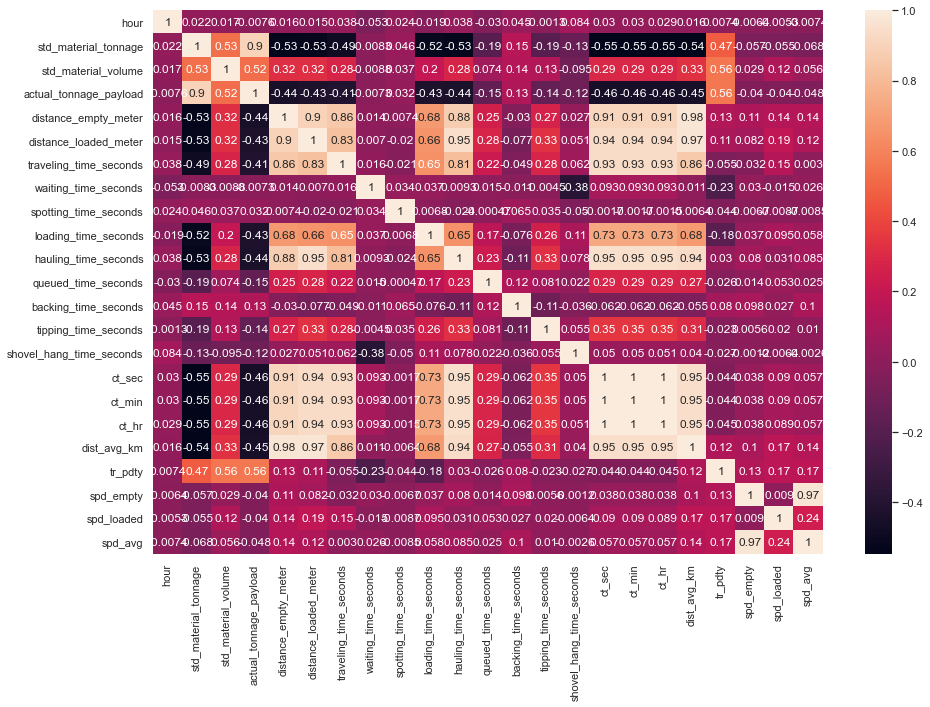

In [60]:
print('Data correlation:\n')

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True)

### 1. Truck Productivity by Truck Type

The productivity of every type of rear dump trucks here can be grouped by each of every truck type in datasets.

In [8]:
print("There are various type of rear dump trucks in the datasets:", df['truck_class'].unique())

There are various type of rear dump trucks in the datasets: ['CAT785' 'CAT789' 'CAT777D-WASTE' 'CAT 777E' 'CAT777D-COAL']


Now, we are trying to group the truck by type in every pit in the dataset.

In [9]:
df_tr_pdty = df[['trucks','truck_class','digger_class', 'pit','material_type', 'tr_pdty']]

In [10]:
group_test_type = df_tr_pdty.groupby(['truck_class',], as_index=True).mean()
print("Average Truck productivity by truck type is:")
group_test_type.round(2)

Average Truck productivity by truck type is:


,tr_pdty
truck_class,
CAT 777E,1340.61
CAT777D-COAL,1245.50
CAT777D-WASTE,595.94
CAT785,1216.16
CAT789,1624.70


### Visualization

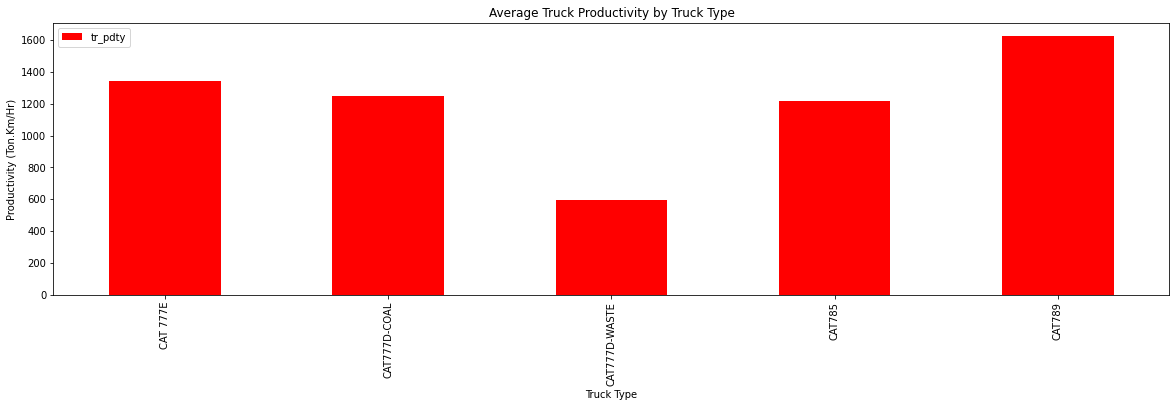

In [11]:
group_test_type.plot(kind='bar', figsize=(20,5), width=(0.5), color=('red'))

plt.title('Average Truck Productivity by Truck Type')
plt.ylabel('Productivity (Ton.Km/Hr)')
plt.xlabel('Truck Type')

plt.show()

### 2. Truck Productivity by Pit

In [12]:
print("There are 4 pit and 1 stockpile in the datasets:", df['pit'].unique())

There are 4 pit and 1 stockpile in the datasets: ['Pit-A' 'Pit-D' 'Pit-B' 'Pit-C' 'Coal_Stockpile']


In [115]:
group_test_pit = df_tr_pdty.groupby(['pit'], as_index=True).mean()
print("Average Truck productivity by Pit :")
group_test_pit.round(2)

Average Truck productivity by Pit :


,tr_pdty
pit,
Coal_Stockpile,1485.56
Pit-A,1301.01
Pit-B,1235.84
Pit-C,1338.75
Pit-D,1119.68


### Visualization

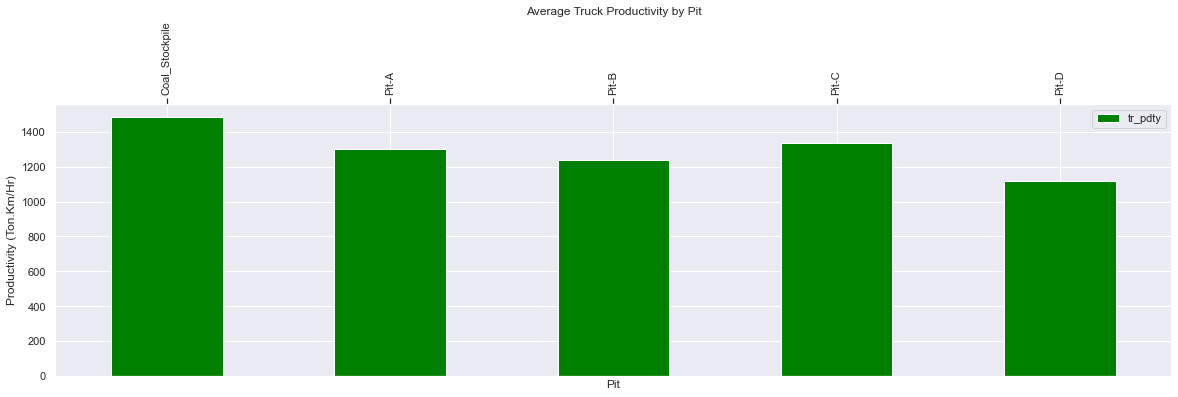

In [116]:
group_test_pit.plot(kind='bar', figsize=(20,5), width=(0.5), color=('green'))

plt.title('Average Truck Productivity by Pit')
plt.ylabel('Productivity (Ton.Km/Hr)')
plt.xlabel('Pit')

plt.show()

### 3. Truck Productivity by Material Type

In [15]:
print("There are 2 material type  in the datasets:", df['material_type'].unique())

There are 2 material type  in the datasets: ['Waste' 'Coal']


In [16]:
group_test_mat = df_tr_pdty.groupby(['material_type'], as_index=True).mean()
print("Average Truck productivity by Material type is:")
group_test_mat.round(2)

Average Truck productivity by Material type is:


,tr_pdty
material_type,
Coal,1283.33
Waste,1282.45


### 4. Truck Productivity by Truck Type grouped by Material Type

This grouped data is much easier to visualize when it is made into a `pivot table`. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In [92]:

pivot_table = df_tr_pdty.groupby(['truck_class','material_type'], as_index=False).mean()
pivot_table.set_index('material_type')

pivot_table = pivot_table.pivot(index='material_type',columns='truck_class').fillna(0).round(2)
pivot_table


tr_pdty                                            
truck_class   CAT 777E CAT777D-COAL CAT777D-WASTE   CAT785  CAT789
material_type                                                     
Coal           1340.61       1245.5          0.00     0.00     0.0
Waste             0.00          0.0        595.94  1216.16  1624.7

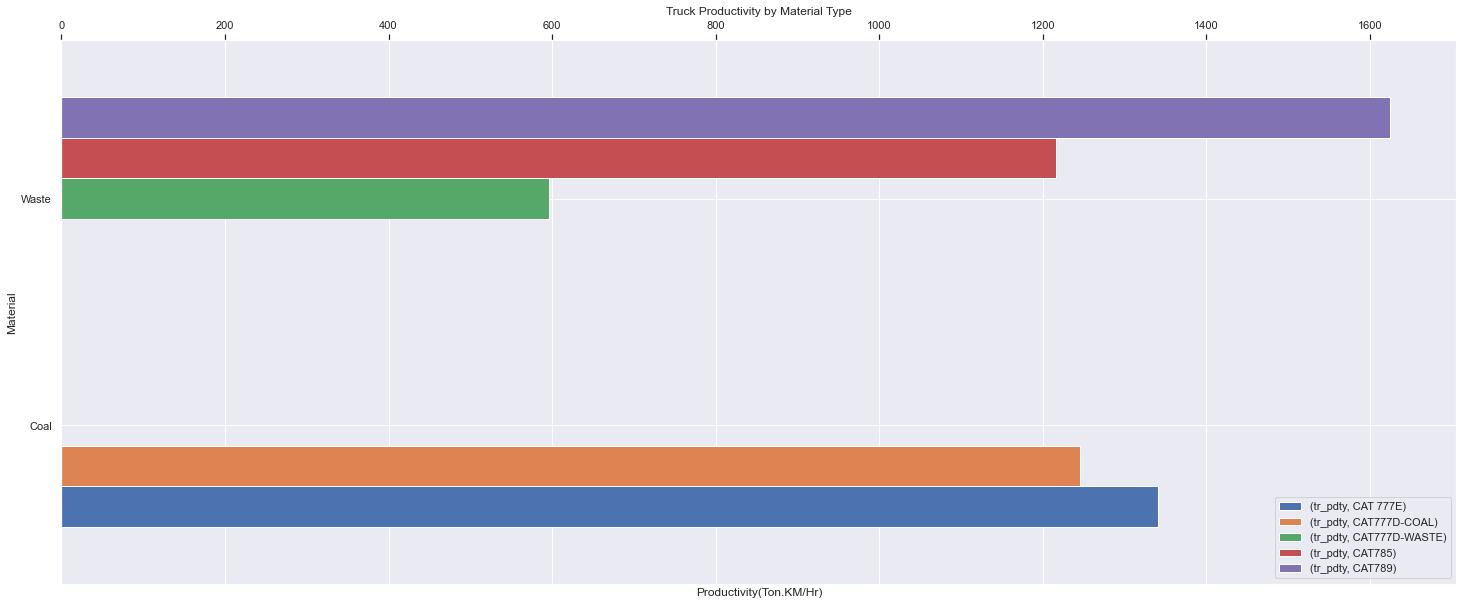

In [108]:
pivot_table.plot(kind='barh', figsize=(25,10), width=(0.9),)

plt.title('Truck Productivity by Material Type')
plt.ylabel('Material')
plt.xlabel('Productivity(Ton.KM/Hr)')
plt.legend()

plt.show()